### Testing Simulation Library

In [8]:
import simulation_library
import potentials
import integrators
import data_logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import visuals

%matplotlib inline
system_builder = simulation_library.SystemFactory()

In [9]:
system = simulation_library.System(dim = 2)
wca = potentials.WCAPotential(1,1)
system.central_potential = potentials.DoubleWellPotential(a = 1,
                                                          b = 6,
                                                          c = 1,
                                                          d = 1)
system.add_particle(simulation_library.Particle(wca, np.array([0,0])))
system.add_particle(simulation_library.Particle(wca, np.array([0,1])))
system.get_integrator("metropolis", None, temp = 5)
coords_logger = data_logging.CoordinateLogger(system, 100)
energy_logger = data_logging.EnergyLogger(system, 100)
system.registerObserver(coords_logger)
system.registerObserver(energy_logger)

In [10]:
system.run(100000)

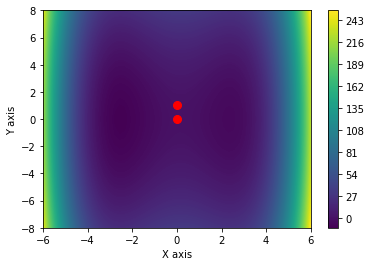

In [11]:
x_traj = np.array(coords_logger.coordinates)
visuals.make_2D_traj_potential(x_traj,
                               potential=system.central_potential,
                              xlim = [-6, 6],
                              ylim = [-8, 8])

In [15]:
system = simulation_library.System(dim = 2)
system.central_potential = potentials.MuellerPotential(alpha = 0.1,
                             A = [-200, -100, -170, 15],
                             a = [-1, -1, -6.5, 0.7],
                             b = [0, 0, 11, 0.6],
                             c = [-10, -10, -6.5, 0.7],
                             xj = [1, 0, -0.5, -1],
                             yj = [0, 0.5, 1.5, 1]
                            )
system.add_particle(simulation_library.Particle(None, np.array([0,0])))
system.get_integrator("metropolis", None, temp = 1)
coords_logger = data_logging.CoordinateLogger(system, 100)
energy_logger = data_logging.EnergyLogger(system, 100)
system.registerObserver(coords_logger)
system.registerObserver(energy_logger)

In [16]:
system.run(100000)

In [ ]:
x_traj = np.array(coords_logger.coordinates)
visuals.make_2D_traj_potential(x_traj,
                               potential=system.central_potential,
                              xlim = [-3, 2],
                              ylim = [-1, 3],
                              cutoff = 10)